# Import Libs

In [61]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

<IPython.core.display.Javascript object>

# Load data

In [2]:
url_to_covid = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [3]:
df_orig = pd.read_csv(url_to_covid)

# Understand structure

In [4]:
df_orig.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

In [5]:
df = df_orig[df_orig.location == 'Austria']

In [6]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
2409,AUT,Europe,Austria,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.908
2410,AUT,Europe,Austria,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.908
2411,AUT,Europe,Austria,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.908
2412,AUT,Europe,Austria,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.908
2413,AUT,Europe,Austria,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,AUT,Europe,Austria,2020-09-16,34744.0,860.0,649.143,757.0,0.0,1.429,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.908
2670,AUT,Europe,Austria,2020-09-17,35448.0,704.0,642.000,758.0,1.0,1.571,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.908
2671,AUT,Europe,Austria,2020-09-18,36370.0,922.0,702.714,758.0,0.0,1.429,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.908
2672,AUT,Europe,Austria,2020-09-19,37191.0,821.0,676.429,763.0,5.0,1.857,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.908


/Users/danieldeutsch/opt/anaconda3/envs/ml_api_covid/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


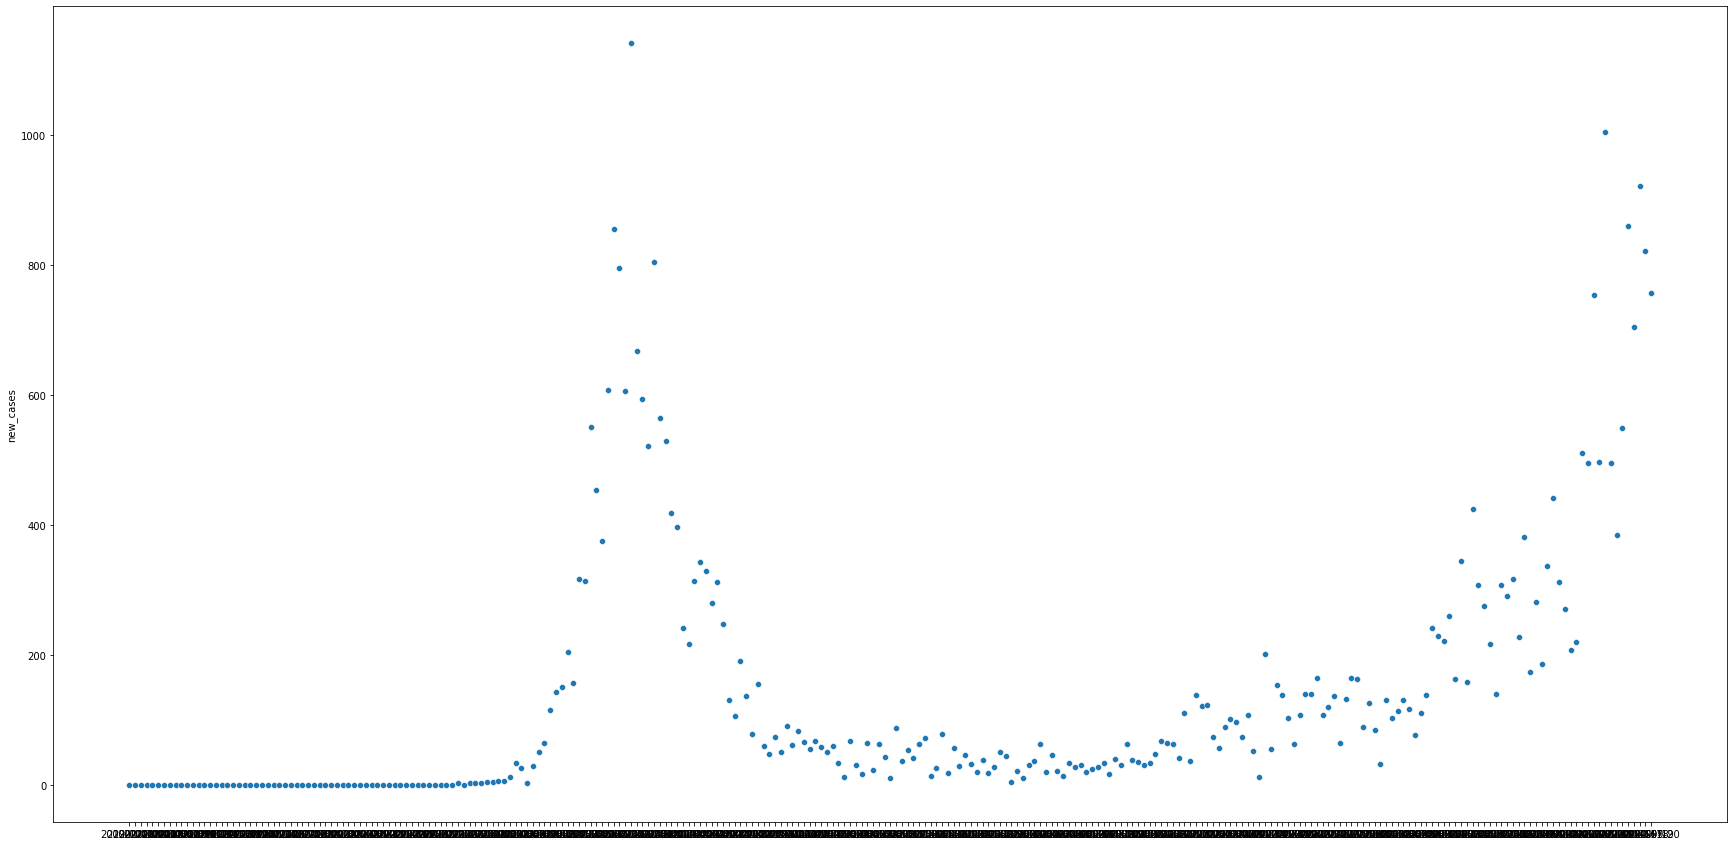

In [7]:
_ = plt.figure(figsize=(30, 15))
sns.scatterplot(sorted(df.date), df.new_cases);

## Check missing

In [8]:
df = df_orig.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44996 entries, 0 to 44995
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         44731 non-null  object 
 1   continent                        44466 non-null  object 
 2   location                         44996 non-null  object 
 3   date                             44996 non-null  object 
 4   total_cases                      44393 non-null  float64
 5   new_cases                        44192 non-null  float64
 6   new_cases_smoothed               43410 non-null  float64
 7   total_deaths                     44393 non-null  float64
 8   new_deaths                       44192 non-null  float64
 9   new_deaths_smoothed              43410 non-null  float64
 10  total_cases_per_million          44128 non-null  float64
 11  new_cases_per_million            44128 non-null  float64
 12  new_cases_smoothed

In [10]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
new_tests,new_tests,65.225798
new_tests_per_thousand,new_tests_per_thousand,65.225798
total_tests_per_thousand,total_tests_per_thousand,64.392390
total_tests,total_tests,64.392390
tests_per_case,tests_per_case,64.110143
positive_rate,positive_rate,63.256734
new_tests_smoothed,new_tests_smoothed,60.956529
new_tests_smoothed_per_thousand,new_tests_smoothed_per_thousand,60.956529
tests_units,tests_units,59.165259
handwashing_facilities,handwashing_facilities,58.329629


In [11]:
cols_too_many_missing = missing_value_df[missing_value_df.percent_missing > 50].index.tolist()
len(cols_too_many_missing)
cols_too_many_missing

10

['new_tests',
 'new_tests_per_thousand',
 'total_tests_per_thousand',
 'total_tests',
 'tests_per_case',
 'positive_rate',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_units',
 'handwashing_facilities']

In [12]:
len(df.columns)

41

In [13]:
df_reduced = df.drop(columns=cols_too_many_missing)

In [14]:
len(df_reduced.columns)

31

In [15]:
df_reduced

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44991,NaN,NaN,International,2020-09-16,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44992,NaN,NaN,International,2020-09-17,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44993,NaN,NaN,International,2020-09-18,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44994,NaN,NaN,International,2020-09-19,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df = df_reduced

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44996 entries, 0 to 44995
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         44731 non-null  object 
 1   continent                        44466 non-null  object 
 2   location                         44996 non-null  object 
 3   date                             44996 non-null  object 
 4   total_cases                      44393 non-null  float64
 5   new_cases                        44192 non-null  float64
 6   new_cases_smoothed               43410 non-null  float64
 7   total_deaths                     44393 non-null  float64
 8   new_deaths                       44192 non-null  float64
 9   new_deaths_smoothed              43410 non-null  float64
 10  total_cases_per_million          44128 non-null  float64
 11  new_cases_per_million            44128 non-null  float64
 12  new_cases_smoothed

In [18]:
missing_iso_code = df[df.iso_code.isna()]
df = df.drop(index=missing_iso_code.index)

In [19]:
missing_continent = df[df.continent.isna()]
df = df.drop(index=missing_continent.index)

In [20]:
for col in df.columns: 
    col, df[col].isna().sum()

('iso_code', 0)

('continent', 0)

('location', 0)

('date', 0)

('total_cases', 603)

('new_cases', 603)

('new_cases_smoothed', 1380)

('total_deaths', 603)

('new_deaths', 603)

('new_deaths_smoothed', 1380)

('total_cases_per_million', 603)

('new_cases_per_million', 603)

('new_cases_smoothed_per_million', 1380)

('total_deaths_per_million', 603)

('new_deaths_per_million', 603)

('new_deaths_smoothed_per_million', 1380)

('stringency_index', 7386)

('population', 0)

('population_density', 2030)

('median_age', 4593)

('aged_65_older', 5188)

('aged_70_older', 4801)

('gdp_per_capita', 5106)

('extreme_poverty', 18287)

('cardiovasc_death_rate', 4578)

('diabetes_prevalence', 3172)

('female_smokers', 13232)

('male_smokers', 13629)

('hospital_beds_per_thousand', 8427)

('life_expectancy', 561)

('human_development_index', 5729)

Now we have removed the rows and columns that contained too many Nans.

# Preprocess for ML

Now we need to encode the nominal variables and impute nans of the numerical variables.

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Encode categorical

In [25]:
nominal = df.select_dtypes(include=['object']).copy()
nominal_cols = nominal.columns.tolist()
nominal_cols

['iso_code', 'continent', 'location', 'date']

In [26]:
encoder = LabelEncoder()
for col in nominal_cols:
    col
    if df[col].isna().sum() > 0:
        df[col].fillna('MISSING', inplace=True)
    df[col] = encoder.fit_transform(df[col])

'iso_code'

'continent'

'location'

'date'

In [27]:
for col in nominal_cols:
    df[col].unique()

array([  1,   4,  55,   5,   2,   3,   9,   7,   8,   0,  10,  11,  12,
        21,  20,  18,  28,  23,  14,  24,  15,  25,  30,  26,  16,  22,
        31,  27, 203,  29,  19,  17,  13, 105,  38,  33,  43,  47,  32,
       185,  35,  36,  41,  42,  40,  44,  37,  86,  45,  46,  48,  49,
        39,  53,  51,  52,  54,  56,  57, 170,  77,  58,  61,  62,  67,
        65,  64,  63,  66, 160,  68,  75,  70,  50,  72,  73,  78,  80,
        79,  82,  81,  71,  74,  76,  83,  87,  85,  84,  88,  95,  91,
        89,  93,  94,  92,  90,  96,  97,  98, 101,  99, 100, 102, 103,
       149, 108, 104, 109, 119, 110, 116, 111, 112, 114, 117, 118, 126,
       123, 137, 138, 124, 127, 128, 134, 136, 125, 122, 121, 131, 130,
       135, 120, 133, 129, 139, 146, 144, 140, 147, 143, 141, 142, 132,
       145, 148, 150, 159, 151, 154, 158, 152, 153, 155, 157, 156, 161,
       162, 163, 164, 106, 113, 201, 171, 175, 165, 167, 173, 182, 169,
       168, 181, 177, 178, 172, 207, 107, 174,  60, 115, 166, 17

array([1, 2, 0, 3, 5, 4])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## Impute missing values of numerical

In [28]:
numerical = df.select_dtypes(include=['float64']).copy()
numerical

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,0.0,0.0,NaN,0.0,0.0,NaN,0.000,0.000,NaN,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
1,0.0,0.0,NaN,0.0,0.0,NaN,0.000,0.000,NaN,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
2,0.0,0.0,NaN,0.0,0.0,NaN,0.000,0.000,NaN,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
3,0.0,0.0,NaN,0.0,0.0,NaN,0.000,0.000,NaN,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
4,0.0,0.0,NaN,0.0,0.0,NaN,0.000,0.000,NaN,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44461,7576.0,45.0,26.857,224.0,0.0,0.857,509.725,3.028,1.807,15.071,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.535
44462,7598.0,22.0,24.143,224.0,0.0,0.286,511.205,1.480,1.624,15.071,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.535
44463,7633.0,35.0,25.714,224.0,0.0,0.286,513.560,2.355,1.730,15.071,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.535
44464,7647.0,14.0,24.000,224.0,0.0,0.000,514.502,0.942,1.615,15.071,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.535


In [29]:
df.total_cases

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
44461    7576.0
44462    7598.0
44463    7633.0
44464    7647.0
44465    7672.0
Name: total_cases, Length: 44466, dtype: float64

In [30]:
for col in numerical:
    df[col].fillna((df[col].mean()), inplace=True)

In [31]:
df.isna().sum().sum() == 0

True

Now the dataset has no Nans and is completely encoded.

## Split into train and test set

In [32]:
X = df.drop(columns=['new_cases'])
y = df.new_cases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [33]:
X_train

,iso_code,continent,location,date,total_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
38410,176,5,180,180,391.0,12.714,10.0,0.0,0.286,666.514,...,4.229000,13767.119000,12.057951,258.314000,12.540000,7.400000,42.900000,3.100000,71.68,0.720000
33251,162,2,156,50,0.0,0.000,0.0,0.0,0.000,0.000,...,11.690000,23313.199000,5.700000,370.946000,9.740000,22.900000,37.100000,6.892000,76.05,0.811000
5376,16,3,24,219,13.0,0.286,0.0,0.0,0.000,495.786,...,5.873396,21009.068523,12.057951,251.490577,8.045981,10.869437,32.619875,3.117967,77.79,0.725508
33555,163,2,157,89,1264.0,136.857,5.0,1.0,0.714,8.661,...,9.393000,24765.954000,0.100000,431.297000,6.180000,23.400000,58.300000,8.050000,72.58,0.816000
30122,142,0,141,247,54463.0,206.000,1027.0,4.0,2.429,264.204,...,1.447000,5338.454000,12.057951,181.013000,2.420000,0.600000,10.800000,3.117967,54.69,0.532000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,145,2,143,89,3845.0,274.143,20.0,4.0,1.857,709.247,...,10.813000,64800.057000,0.200000,114.316000,5.310000,19.600000,20.700000,3.600000,82.40,0.953000
21243,101,1,99,227,51513.0,1099.714,1072.0,10.0,5.571,407.293,...,18.493000,39002.223000,12.057951,79.370000,5.720000,11.200000,33.700000,13.050000,84.63,0.909000
42613,204,3,200,121,66.0,1.714,4.0,0.0,0.143,632.045,...,10.799000,21009.068523,12.057951,273.670000,12.260000,10.869437,32.619875,3.117967,80.58,0.725508
43567,205,1,205,48,16.0,0.286,0.0,0.0,0.000,0.164,...,4.718000,6171.884000,2.000000,245.465000,6.000000,1.000000,45.900000,2.600000,75.40,0.694000


# Add ML

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 
from sklearn.model_selection import RandomizedSearchCV
from joblib import dump, load

In [35]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 0, max_depth=len(df_orig.columns))

In [36]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=41, random_state=0)

In [37]:
y_pred = rf.predict(X_test)

In [38]:
print(f'{r2_score(y_test, y_pred):.2%}')

99.35%


## Improve hyperparameters

In [68]:
random_grid = {'n_estimators': np.arange(200,600,100),
#                'max_features': ['auto', 'sqrt'],
               'max_depth': np.arange(10,60,5),
               'min_samples_split': [2, 5],
               'min_samples_leaf': [2,4]}#,
#                'bootstrap': [True, False]}

In [69]:
rf_random = RandomizedSearchCV(
    estimator = rf, 
    param_distributions = random_grid, 
    n_iter = 100, cv = 3, verbose=2, random_state=0)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_depth=40 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_depth=40, total= 1.6min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_depth=40 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_depth=40, total= 1.4min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_depth=40 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_depth=40, total= 1.5min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=45 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=45, total=  51.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=45 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=45, total= 1.0min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=45 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=45, total=  52.5s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_depth=50 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_depth=50, total= 2.3min
[CV] n_estimators=500, min_samples_split=5, min_samp

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_depth=25, total= 1.9min
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_depth=25 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_depth=25, total= 1.8min
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=40 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=40, total= 1.2min
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=40 


In [ ]:
rf_random.best_params_

## Re-run 

In [44]:
# rf = RandomForestRegressor(**rf_random.best_params_, random_state = 1)

In [45]:
# y_pred = rf.predict(X_test)

In [46]:
# print(f'{r2_score(y_test, y_pred):.2%}')

# Save model

In [55]:
# dump(rf, 'rf_model.joblib') 
dump(rf, 'rf_model.joblib',compress=3)

['rf_model.joblib']

# Predict on country

In [48]:
input_val = 'Germany'

In [49]:
encoder.fit_transform(df_orig['location'])

array([ 0,  0,  0, ..., 92, 92, 92])

In [50]:
encode_ind = (encoder.classes_).tolist().index(input_val)

In [51]:
df_orig[df_orig.location == input_val]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
15535,DEU,Europe,Germany,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
15536,DEU,Europe,Germany,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
15537,DEU,Europe,Germany,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
15538,DEU,Europe,Germany,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
15539,DEU,Europe,Germany,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15795,DEU,Europe,Germany,2020-09-16,263663.0,1901.0,1455.571,9368.0,6.0,4.286,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
15796,DEU,Europe,Germany,2020-09-17,265857.0,2194.0,1498.714,9371.0,3.0,4.286,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
15797,DEU,Europe,Germany,2020-09-18,267773.0,1916.0,1560.429,9378.0,7.0,5.143,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
15798,DEU,Europe,Germany,2020-09-19,270070.0,2297.0,1655.714,9384.0,6.0,5.286,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936


In [52]:
to_pred = X[X.location == encode_ind].iloc[-1].values.reshape(1,-1)

In [53]:
rf.predict(to_pred)[0] 

1838.76